# Secondary structure

In [14]:
import pandas as pd
from scipy.stats import entropy
import scipy
from plotnine import *

## Read in data

### RSA data 

In [120]:
RSA = pd.read_csv("https://raw.githubusercontent.com/hutch-gwc/Rosalind/master/rsa.csv")  # read the data
RSA.drop(['index'], axis=1, inplace=True)  # drop column we don't need
RSA = RSA[RSA.protein == "Flu"]  # we only want the flu protein
RSA.drop(['protein'], axis=1, inplace=True)  # we don't need the protein column any more
RSA.head()

,site,RSA
530,18,0.170984
531,19,0.168605
532,20,0.000000
533,21,0.077844
534,22,0.005076


### Preferences

In [121]:
prefs = pd.read_csv("https://raw.githubusercontent.com/hutch-gwc/Rosalind/master/HA_prefs_wt.csv")  # read in the data 
prefs.head()

,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,Y,site,wt
0,0.050522,0.292074,0.041984,0.069723,0.112054,0.070729,0.207317,0.172276,0.175882,0.170153,...,0.095909,0.145664,0.068147,0.169200,0.216658,0.183667,0.070102,0.282156,1,K
1,0.299156,0.092621,0.193645,0.147577,0.093380,0.048215,0.110770,0.303162,0.100233,0.172399,...,0.130529,0.103289,0.232608,0.080003,0.153042,0.209860,0.049683,0.175782,2,A
2,0.282239,0.054260,0.075008,0.115239,0.052471,0.070930,0.090155,0.078627,0.245923,0.158548,...,0.086427,0.165511,0.145599,0.226275,0.227845,0.169360,0.081525,0.108752,3,K
3,0.285097,0.571661,0.023748,0.078999,0.264428,0.101803,0.186965,0.092665,0.074159,0.344304,...,0.042051,0.093530,0.064137,0.017293,0.103523,0.148757,0.218695,0.103401,4,L
4,0.185255,0.157839,0.127189,0.069883,0.490540,0.035142,0.066323,0.136314,0.044657,0.525195,...,0.071764,0.058580,0.098211,0.033002,0.051313,0.269358,0.093787,0.249184,5,L


## Merge RSA and Prefs data

In [122]:
# we are going to use a `pandas` function called "merge" to put all of our data into one dataframe
# `on` asks what do we want to match in the two dataframes? 
# in our case, the "site" in RSA is the same as the "site" in prefs 
# `how` tells `pandas` what to do if there is a site in one dataframe but not in another. 
# `inner` says "drop these sites"
df = pd.merge(RSA, prefs, on='site', how='inner')
df.head()

,site,RSA,A,C,D,E,F,G,H,I,...,N,P,Q,R,S,T,V,W,Y,wt
0,18,0.170984,0.031051,0.032774,0.066396,0.130986,0.077862,0.010545,0.230710,0.057492,...,0.110354,0.016166,0.196481,0.325941,0.336750,0.297381,0.198282,0.063771,0.161101,T
1,19,0.168605,0.035575,0.074407,0.097060,0.050744,0.068674,0.030246,0.057919,1.135448,...,0.046414,0.131968,0.050284,0.059777,0.032668,0.205351,0.276241,0.083863,0.066269,I
2,20,0.000000,0.057711,1.578429,0.123115,0.056940,0.157598,0.053046,0.048184,0.054634,...,0.061416,0.055079,0.060295,0.098218,0.047429,0.044885,0.062976,0.139656,0.110007,C
3,21,0.077844,0.089144,0.100696,0.064763,0.094098,0.055839,0.038984,0.092634,1.469510,...,0.042902,0.039655,0.082291,0.039980,0.084321,0.099074,0.142382,0.103434,0.050375,I
4,22,0.005076,0.058867,0.135161,0.138590,0.079870,0.056306,1.476877,0.061189,0.051963,...,0.068674,0.029653,0.079329,0.068681,0.084593,0.037853,0.149194,0.105167,0.064609,G


## Entropy?

In [118]:
# amino_acids = [x for x in list(df.columns.values) if x not in ["site", "RSA"]]
# df["entropy"] = df[amino_acids].apply(lambda r: tuple(r), axis=1).apply(scipy.array)
# df["entropy"] = df["entropy"].apply(lambda x: scipy.log(entropy(x)))
# df.head()

TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [112]:
# df = pd.melt(df, id_vars=["site", "RSA", "entropy"], var_name="amino_acid", value_name="pref")
# df.head()

,site,RSA,entropy,amino_acid,pref
0,18,0.170984,1.007952,A,0.031051
1,19,0.168605,0.859274,A,0.035575
2,20,0.000000,0.714210,A,0.057711
3,21,0.077844,0.766489,A,0.089144
4,22,0.005076,0.764519,A,0.058867


In [113]:
# df["type"] = df["amino_acid"].apply(lambda x: classification[x])
# df

,site,RSA,entropy,amino_acid,pref,type
0,18,0.170984,1.007952,A,0.031051,non-polar
1,19,0.168605,0.859274,A,0.035575,non-polar
2,20,0.000000,0.714210,A,0.057711,non-polar
3,21,0.077844,0.766489,A,0.089144,non-polar
4,22,0.005076,0.764519,A,0.058867,non-polar
5,23,0.000000,0.890160,A,0.066685,non-polar
6,24,0.000000,0.942361,A,0.150568,non-polar
7,25,0.080357,0.804719,A,1.197418,non-polar
8,26,0.007752,0.706793,A,0.044012,non-polar
9,27,0.143590,0.716339,A,0.029717,non-polar


## Classify the amino acids

In [153]:
classification = {'R': "polar C", 'N': "polar NC", 'D': "polar NC", 'C': "polar NC", 'E': "polar C", 'Q': "polar NC", 'H': "polar C",
                 'K': "polar C", 'S': "polar NC", 'T': "polar NC", 'W': "non-polar", 'A': "non-polar", 'G': "non-polar",
                 'I': "non-polar", 'L': "non-polar", 'M': "non-polar", 'F': "non-polar", 'P': "non-polar", 'V': "non-polar", 'Y': "polar NC"}        
classification

{'A': 'non-polar',
 'C': 'polar NC',
 'D': 'polar NC',
 'E': 'polar C',
 'F': 'non-polar',
 'G': 'non-polar',
 'H': 'polar C',
 'I': 'non-polar',
 'K': 'polar C',
 'L': 'non-polar',
 'M': 'non-polar',
 'N': 'polar NC',
 'P': 'non-polar',
 'Q': 'polar NC',
 'R': 'polar C',
 'S': 'polar NC',
 'T': 'polar NC',
 'V': 'non-polar',
 'W': 'non-polar',
 'Y': 'polar NC'}

In [157]:
n_classification = {'R': "polar", 'N': "polar", 'D': "polar", 'C': "polar", 'E': "polar", 'Q': "polar", 'H': "polar",
                 'K': "polar", 'S': "polar", 'T': "polar", 'W': "non-polar", 'A': "non-polar", 'G': "non-polar",
                 'I': "non-polar", 'L': "non-polar", 'M': "non-polar", 'F': "non-polar", 'P': "non-polar", 'V': "non-polar", 'Y': "polar"}        
classification

{'A': 'non-polar',
 'C': 'polar NC',
 'D': 'polar NC',
 'E': 'polar C',
 'F': 'non-polar',
 'G': 'non-polar',
 'H': 'polar C',
 'I': 'non-polar',
 'K': 'polar C',
 'L': 'non-polar',
 'M': 'non-polar',
 'N': 'polar NC',
 'P': 'non-polar',
 'Q': 'polar NC',
 'R': 'polar C',
 'S': 'polar NC',
 'T': 'polar NC',
 'V': 'non-polar',
 'W': 'non-polar',
 'Y': 'polar NC'}

In [158]:
df["wt_type"] = df["wt"].apply(lambda x: n_classification[x])
temp = []
for name, group in df.groupby(["wt_type"]):
    avg = group["RSA"].mean()
    temp.append([avg, name])
temp = pd.DataFrame(temp, columns = ["avg", "wt_type"])

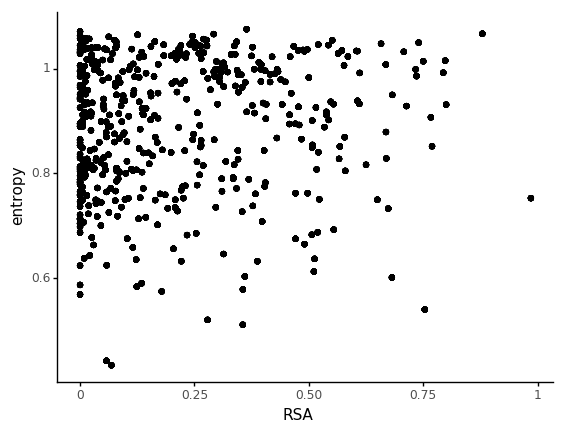

In [114]:
temp = df[df.RSA > 0.05]
p = (ggplot(df, aes('RSA', 'entropy'))
 + geom_point()
#  + facet_wrap(['run', 'metric'])
 + theme_classic()
#  + labs(x="Distance between site pair", color="Number of \nswapped sites")
#  + theme(strip_background = element_blank(), 
#          strip_text=element_text(size=12), 
#          legend_text = element_text(size=10))
#  + scale_color_manual([orange, pink, blue, green])) 
    )
_ = p.draw()

In [164]:
df = pd.melt(df, id_vars=["site", "RSA", "wt", "wt_type"], var_name="amino_acid", value_name="pref")
df.head()

,site,RSA,wt,wt_type,amino_acid,pref
0,18,0.170984,T,polar,A,0.031051
1,19,0.168605,I,non-polar,A,0.035575
2,20,0.000000,C,polar,A,0.057711
3,21,0.077844,I,non-polar,A,0.089144
4,22,0.005076,G,non-polar,A,0.058867


In [167]:
df["amino_acid_type"] = df["amino_acid"].apply(lambda x: n_classification[x])
df["changeTo"] = df[["wt_type", "amino_acid_type"]].apply(lambda x: "{0}TO{1}".format(x[0], x[1]), axis=1)
df.head()

,site,RSA,wt,wt_type,amino_acid,pref,amino_acid_type,changeTo
0,18,0.170984,T,polar,A,0.031051,non-polar,polarTOnon-polar
1,19,0.168605,I,non-polar,A,0.035575,non-polar,non-polarTOnon-polar
2,20,0.000000,C,polar,A,0.057711,non-polar,polarTOnon-polar
3,21,0.077844,I,non-polar,A,0.089144,non-polar,non-polarTOnon-polar
4,22,0.005076,G,non-polar,A,0.058867,non-polar,non-polarTOnon-polar


In [177]:
temp = []
for name, group in df.groupby(["changeTo"]):
    new_pref = group["pref"].mean()
    temp.append([name, new_pref])
temp = pd.DataFrame(temp, columns=["changeTo", "max_pref"])
temp.head()

,changeTo,max_pref
0,non-polarTOnon-polar,0.216684
1,non-polarTOpolar,0.095440
2,polarTOnon-polar,0.111937
3,polarTOpolar,0.181143


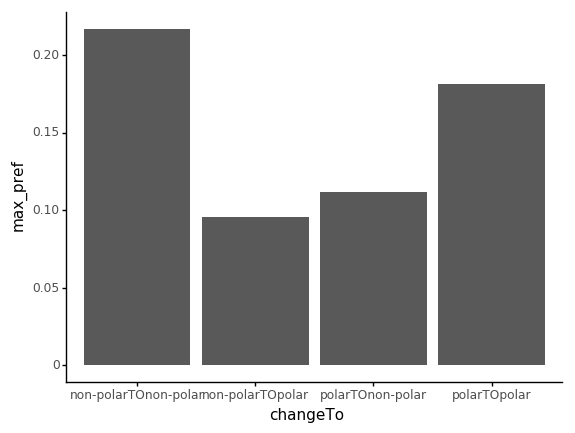

In [178]:
p = (ggplot(temp, aes('changeTo', 'max_pref'))
 + geom_bar(stat="identity")
#  + facet_wrap(['run', 'metric'])
 + theme_classic()
#  + labs(x="Distance between site pair", color="Number of \nswapped sites")
#  + theme(strip_background = element_blank(), 
#          strip_text=element_text(size=12), 
#          legend_text = element_text(size=10))
#  + scale_color_manual([orange, pink, blue, green])) 
    )
_ = p.draw()